# Rosenthal's Equation for Point Heat Source
[Paper](https://watermark.silverchair.com/849_1.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAABH0wggR5BgkqhkiG9w0BBwagggRqMIIEZgIBADCCBF8GCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMdFGi-j--D2Sv5oWJAgEQgIIEMFWJym_qw5PQAPgyEofmbwbCkx25ENovtwQY0-WE_nqLZwPRSY7iMMpaLvjEh1IqP268eEWguBfquR4l-CXWNT2vskLKfCrvZX0uQZICZLTQzdEIZrZJu3RyjwGNgFSA24ZTYr177tgzMv0Vtbgnks6khyNb5HnwNNY0uDHKJDyBO7mysskGlH3L73UNxb11atoRL30e7kp4XUPkO7W_2nJ2pG3RB472-mss8YyF8U1KKn6zL3ufSpfA-LgS61qCfqHcy4nTu3Ukw0buz1qOusSDV3Xb3tsyGGFhKePZ1hqbp5uhndAaRgG-AldV7CLp6SRBA-9S4lRjgremTWeW3RCMGn-TLBQhT30SR4_ydIrYa2XwM5zWt9Q-hy1KIQB2PzulmV_bkWpjslKC2BxUPUVzZf6hKUzHcY_OFfdd4VKONhWliEVLj-hZjXZCO1n4W-vbe7vg3dU3g54s8UGn9SXLRAy6YxJsvqP80z_VBi_w0QJkm6HAkKwaEhcegJhDJRamp2qRMfewrbLESYZ0J8JaGa_NdqVoOiUG33265CXR-Wk_hOz3c0qwHQxfM_jNGh6u3AuDc-dDV1yg-BFt-B2qKagdRLfoDJsyxQ62vjTswxUcr6UlYowJHgHT_cF1CwawcsaFP7_03YKSdD-Nhap4KKg0W6ZvTzYj3LF0x1FP9PT2qWlmsXRYLUa_xyO63Nmh48SLaQNjuHhdEUFFZoUb7_VCBfbzIq9bHr1Xmvb8JPVW6GSB5T9APoxLEbPPxfZe4vDtBgVGEVB81TRasA85dV2yz3Sd94yl1-hgFgkz3Jtrw4z8Xhqxu7CWztw2gUCZ7iQTba6ebdY3INtwhyCkgoB3DGXeJISdgSp-Pd4N58w9qx6TutSYqmqZcp1jlTlz5NBMhaVr_rX52djjCGdv0ExYdby853Nh2r1XI4KPH18nuJ-aK2jOIQUEtx1UJjAf0ITCvbYMlsjpLP63u8m34xbl3IKtrytXnMVBuG4tllJrExLDW2ryVx5qR6XBqRO1Ark81AyPu0UOtgPPW3yU_-tbB59K1yPiuWtsYHk77sz2U3hVFU-jVNRlqwStI8CLjx7C5wBhxk-IsUSyk_wX88yzUtf6NFM-5O9gtWuO1EG1UjRR5KT9vumCcf7Bqa9D-GYRcSSnPgeBq9k67NIWlp7JlGrPXMKAm5zjkZjYS9N2vmkvEGeCjf7ZE3YnO6QZQSpiRQi6EKVJqSAWUNsv0nAKyKpIqMaEFB-bZuUyKAxuia54DWavejhdf8JfuxpNythdSA2wFaWPIWTCKhQpQCZ0sfJe6S1XbLolrlTF43C65zM_MFsQkK0VxuBUprCM3BKKQ-7q056l7JtQ1mKoJCl3TCjn4RyMcfjT6kCwFaYkcYPVIIU5JGgh1-FHY5rX1fJTLDgfI60NuFCP_JE)

## Shape of Temperature Field

$$
T = T_\infty + \frac{Q}{2 \pi k R} \exp\left( \frac{V z}{2 \alpha} \right) \exp\left( \frac{-V R}{2 \alpha} \right)
$$

However due to left and right exponential terms diverging to 0 and infinity, the exponential terms are combined in the code to prevent numerical overflow.


$$
T = T_\infty + \frac{Q}{2 \pi k R} \exp\left( \frac{V(z - R)}{2\alpha} \right)
$$

 98%|█████████▊| 49/50 [00:12<00:00,  4.45it/s]

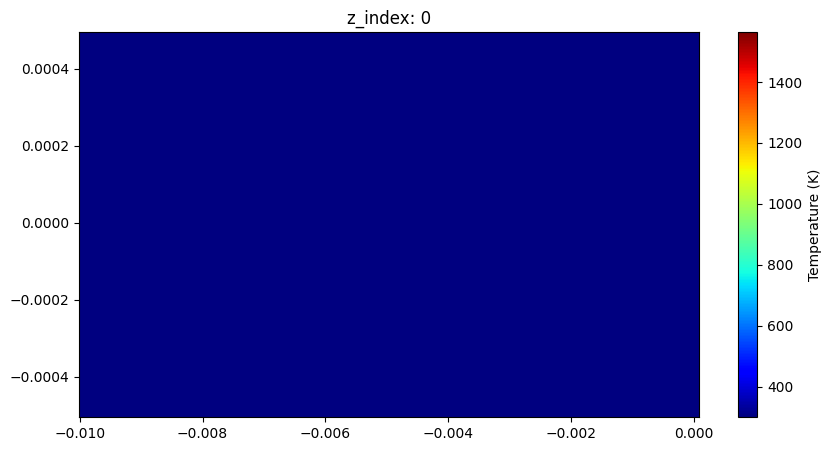

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

# Inconel 625 alloy properties
epsilon = 0.60            # absorptivity
k = 10                    # thermal_conductivity
rho = 8400                # density
c_p = 470                 # heat_capacity
alpha = k / (rho * c_p)   # thermal_diffusivity
t_delta = 1299.85         # temperature melting - temperature initial
t_infinity = 300          # preheat
power = 638
velocity = 2

def rosenthal_temperature_field(x, y, z, temp_ceiling = None):
    """
    Assumes that (0, 0, 0) is the point heat source.
    """
    # Assuming x is along the weld center line
    zeta = -x

    # r is the cylindrical radius composed of y and z
    r = np.sqrt(y**2 + z**2)

    R = np.sqrt(zeta**2 + r**2)

    first_term = (power * epsilon) / (2 * np.pi * k * R)

    second_and_third_term = np.exp((velocity * (zeta - R))/ (2 * alpha))

    temp = t_infinity + first_term * second_and_third_term

    if temp_ceiling is not None:
        temp = np.minimum(temp, temp_ceiling)

    return temp

zs = np.arange(-5*10**-4, 0, 10**-5)
ys = np.arange(-5 * 10**-4, 5 * 10**-4, 10**-5)
xs = np.arange(-10**-2, 10**-4, 10**-5)

X, Y, Z = np.meshgrid(xs, ys, zs)
# print(X.shape, Y.shape, Z.shape)

temp_field = rosenthal_temperature_field(X, Y, Z, temp_ceiling=1563)
# print(temp_field.shape, np.min(temp_field), np.max(temp_field))


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
c = ax.pcolormesh(xs, ys, temp_field[:, :, 0], cmap = 'jet', vmin = 300, vmax = 1563)
fig.colorbar(c, ax=ax, label="Temperature (K)")

def update(z_index):
    ax.clear()
    ax.set_title(f"z_index: {z_index}")
    ax.pcolormesh(xs, ys, temp_field[:, :, z_index], cmap = 'jet', vmin = 300, vmax = 1563)

animate = FuncAnimation(fig, update, frames=(tqdm(range(len(zs)))))

HTML(animate.to_html5_video())

## Outline of a melt pool
Rosenthal's Equation has been rearranged to provide the bounds of the melt pool.

$$
z = R + \frac{2 \alpha}{V}ln\left(\frac{2 \pi k R \Delta T}{\epsilon P}\right)
$$

$\Delta T = T_{melting} - T_{initial}$

$\epsilon = 0.60$ (unitless)

$k = 10$ (W/mK) (Watt / meter-kelvin)

$\alpha = \frac{k}{\rho C_p}$

$V = 2$ (m/s)

$r = 0.0002 m / 2$ (melt pool size, divided by 2 for radius) = 0.0001 m

/tmp/ipykernel_1458884/3814575860.py:30: RuntimeWarning: invalid value encountered in sqrt
  r_values.append(np.sqrt(R**2 - z**2))
/tmp/ipykernel_1458884/3814575860.py:31: RuntimeWarning: invalid value encountered in sqrt
  r_values_negative.append(-np.sqrt(R**2 - z**2))


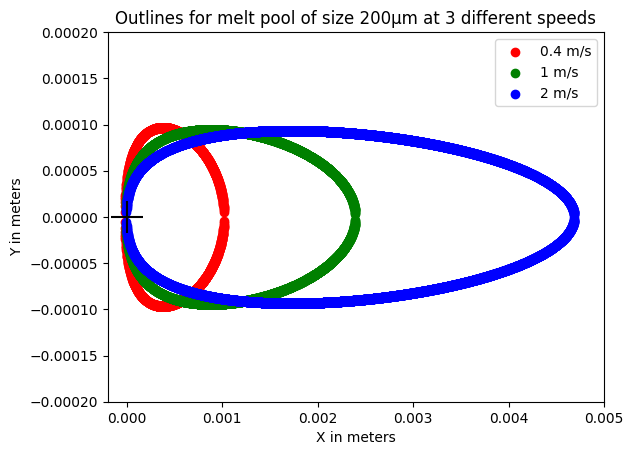

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Inconel 625 alloy properties
epsilon = 0.60            # absorptivity
k = 10                    # thermal_conductivity
rho = 8400                # density
c_p = 470                 # heat_capacity
alpha = k / (rho * c_p)   # thermal_diffusivity
t_delta = 1299.85         # temperature melting - temperature initial

def rosenthal(R, v, p):
    return R + (((2*alpha)/v) * np.log((2 * np.pi * k * R * t_delta)/(epsilon * p)))

color_values = ["r", "g", "b"]
v_values = [0.4, 1, 2]                  # velocities
p_values = [138.558, 325.977, 638.341]  # powers

plt.axis([-200 * 10 ** -6, 0.005, -200 * 10 ** -6, 200 * 10 ** -6])
R_values = np.arange(10**-6, 0.00469, 10**-6)

for index, velocity in enumerate(v_values):
    r_values = []
    r_values_negative = []
    z_values = []

    for R in R_values:
        z = rosenthal(R, velocity, p_values[index])
        z_values.append(z)
        r_values.append(np.sqrt(R**2 - z**2))
        r_values_negative.append(-np.sqrt(R**2 - z**2))

    plt.scatter(z_values, r_values, c=color_values[index], label=f"{velocity} m/s")
    plt.scatter(z_values, r_values_negative, c=color_values[index])

plt.title(f"Outlines for melt pool of size 200μm at 3 different speeds")
plt.xlabel("X in meters")
plt.ylabel("Y in meters")
plt.legend()

# Plots + at origin.
plt.scatter(0, 0, marker="+", s=500, c="black")

plt.show()


## Dimensions of a melt pool

In [ ]:
import numpy as np

# Inconel 625 alloy properties
epsilon = 0.60            # absorptivity
k = 10                    # thermal_conductivity W/(m·K)
rho = 8400                # density kg/m³
c_p = 470                 # heat_capacity J/(kg·K)
alpha = k / (rho * c_p)   # thermal_diffusivity m²/s
t_delta = 1299.85         # temperature melting - temperature initial (K)

def rosenthal(R, v, p):
    """Rosenthal equation: z = f(R)"""
    return R + (((2*alpha)/v) * np.log((2 * np.pi * k * R * t_delta)/(epsilon * p)))

def find_r_max(v, p):
    """Find R where z = R (curve closure point where r = 0)"""
    # At the tail point: z = R, which means the log term must equal 0
    # R + (2α/v)ln(2πkRΔT/εP) = R
    # Therefore: ln(2πkRΔT/εP) = 0
    # So: 2πkRΔT/εP = 1
    # Solving for R: R = εP/(2πkΔT)
    R_tail = (epsilon * p) / (2 * np.pi * k * t_delta)
    return R_tail

def find_melt_pool_dimensions(v, p):
    """Find melt pool dimensions using derivative approach"""
    # Find the tail point analytically
    R_tail = find_r_max(v, p)
    
    # Generate R values up to slightly beyond the tail
    R_values = np.linspace(1e-6, R_tail * 1.1, 5000)
    
    max_width_r = 0
    min_z = 0  # Length in front of heat source (negative z)
    width_point_z = 0
    
    # Find critical points by analyzing the parametric curve
    for R in R_values:
        z = rosenthal(R, v, p)
        
        if R**2 > z**2:  # Valid region where we can compute r
            r = np.sqrt(R**2 - z**2)
            
            # Track maximum r (width point where dr/dz ≈ 0)
            if r > max_width_r:
                max_width_r = r
                width_point_z = z
            
            # Track minimum z (length in front of heat source)
            if z < min_z:
                min_z = z
    
    # Maximum z occurs at the tail point (length behind heat source)
    max_z = rosenthal(R_tail, v, p)
    
    return {
        'width': 2 * max_width_r,
        'depth': max_width_r,  # Penetration depth into material
        'length_front': abs(min_z),  # Length in front of heat source
        'length_behind': max_z,  # Length behind heat source
        'length_total': max_z - min_z,  # Overall length
        'R_tail': R_tail,
        'width_z': width_point_z
    }

# Analyze three different velocities
v_values = [0.4, 1, 2]                  # velocities (m/s)
p_values = [138.558, 325.977, 638.341]  # powers (W)

print("MELT POOL DIMENSIONS")
print("=" * 60)
for v, p in zip(v_values, p_values):
    dims = find_melt_pool_dimensions(v, p)
    print(f"\nVelocity = {v} m/s, Power = {p:.1f} W:")
    print(f"  Width:         {dims['width']*1e6:7.1f} μm (diameter)")
    print(f"  Depth:         {dims['depth']*1e6:7.1f} μm (penetration into material)")
    print(f"  Length front:  {dims['length_front']*1e6:7.1f} μm (ahead of heat source)")
    print(f"  Length behind: {dims['length_behind']*1e6:7.1f} μm (trailing)")
    print(f"  Length total:  {dims['length_total']*1e6:7.1f} μm (overall)")

MELT POOL DIMENSIONS

Velocity = 0.4 m/s, Power = 138.6 W:
  Width:           193.2 μm (diameter)
  Depth:            96.6 μm (penetration into material)
  Length front:     23.7 μm (ahead of heat source)
  Length behind:  1017.9 μm (trailing)
  Length total:   1041.6 μm (overall)

Velocity = 1 m/s, Power = 326.0 W:
  Width:           188.7 μm (diameter)
  Depth:            94.3 μm (penetration into material)
  Length front:     12.5 μm (ahead of heat source)
  Length behind:  2394.8 μm (trailing)
  Length total:   2407.3 μm (overall)

Velocity = 2 m/s, Power = 638.3 W:
  Width:           186.9 μm (diameter)
  Depth:            93.5 μm (penetration into material)
  Length front:      7.9 μm (ahead of heat source)
  Length behind:  4689.5 μm (trailing)
  Length total:   4697.4 μm (overall)
